In [1]:
#第7章/定义测试函数
from diffusers import DiffusionPipeline
from matplotlib import pyplot as plt
%matplotlib inline
import torch


def test(pipeline):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    pipeline = pipeline.to(device)

    texts = [
        'A photo of little dog in a bucket', 'A photo of little dog swimming',
        'A photo of little dog sleeping', 'A photo of little dog in a doghouse'
    ]

    images = [pipeline(i).images[0] for i in texts]

    plt.figure(figsize=(10, 5))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.show()

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

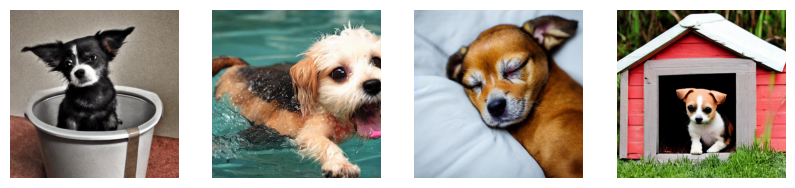

In [2]:
#第7章/测试训练前的模型
pipeline = DiffusionPipeline.from_pretrained('runwayml/stable-diffusion-v1-5',
                                             safety_checker=None)

test(pipeline)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

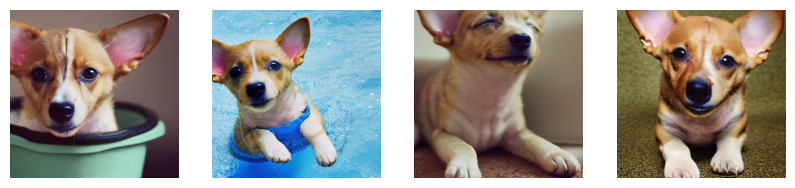

In [3]:
#第7章/测试训练后的模型
pipeline.unet.load_attn_procs('./save')

test(pipeline)